In [1]:
from sklearn import datasets
from KNN.model_selection import train_test_split
digits = datasets.load_digits()
X = digits.data
y = digits.target
X_train, X_test,y_train,y_test = train_test_split(X,y,test_ratio=0.2)

### 超参数和模型参数

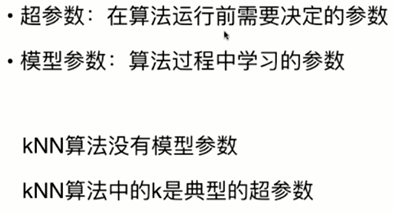

如何寻找好的超参数

领域知识

经验数值

实验搜索

### 寻找最佳的K

In [2]:
best_score = 9.0
best_k = -1

In [3]:
from sklearn.neighbors import KNeighborsClassifier

In [4]:
best_score = 0.0
best_k = -1
for k in range(1,11):
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(X_train, y_train)
    score = knn_clf.score(X_test, y_test)
    if score > best_score:
        best_k = k
        best_score = score
print("best_k = ",best_k)
print("best_score = ",best_score)

best_k =  1
best_score =  0.9944289693593314


考虑调看近邻的权重
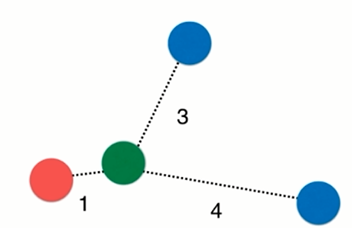

考虑距离：红色：1 蓝色 ：1/3 +1/4 = 7/12 红色胜

In [5]:
best_method = ""
best_score = 0.0
best_k = -1
for method in ["uniform", "distance"]:
    for k in range(1,11):
        knn_clf = KNeighborsClassifier(n_neighbors=k,weights=method)
        knn_clf.fit(X_train, y_train)
        score = knn_clf.score(X_test, y_test)
        if score > best_score:
            best_k = k
            best_score = score
            best_method = method
print("best method = ",best_method)
print("best_k = ",best_k)
print("best_score = ",best_score)

best method =  uniform
best_k =  1
best_score =  0.9944289693593314


### 　欧拉距离
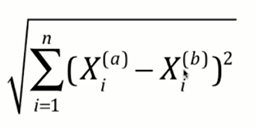

###　曼哈顿距离
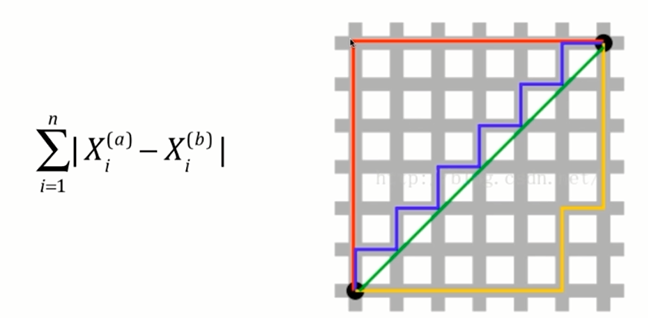

### 明科夫斯基距离

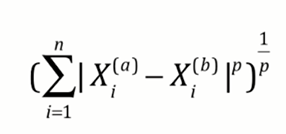
推导出超参数p

### 　搜索明科夫斯基相应的ｐ

In [6]:
%%time
best_ｐ = -1
best_score = 0.0
best_k = -1
for k in range(1,11):
    for p in range(1,6):
        knn_clf = KNeighborsClassifier(n_neighbors=k,weights="distance",p=p)
        knn_clf.fit(X_train, y_train)
        score = knn_clf.score(X_test, y_test)
        if score > best_score:
            best_k = k
            best_score = score
            best_p = p
print("best p = ",best_p)
print("best_k = ",best_k)
print("best_score = ",best_score)

best p =  2
best_k =  1
best_score =  0.9944289693593314
Wall time: 26.4 s
